**Priprema za ispit bez korištnja AI**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy import sign


**1. zadatak - Pogreške i nelinearne jednadžbe (LV1)**

1. Grafički procijenite interval u kojem se nalazi nultočka funkcije.


In [ ]:
def rootsearch(f,a,b,dx):
    x1 = a; f1 = f(a)
    x2 = a + dx; f2 = f(x2)
    while sign(f1) == sign(f2):
        if x1 >= b:
            return None, None
        x1 = x2; f1 = f2
        x2 = x1 + dx; f2 = f(x2)
    else:
        return x1, x2

Promatra se funkcija e^-x - x

In [ ]:
def f(x):
  return np.exp(-x) - x

funkcija ide od -3 do 3 prema grafu sa wolfram alpha

In [ ]:
A, B, DX = -3, 3, 0.05

In [ ]:
# Parametri pretrage
roots_intervals = []
a = A
while a < B:
    x1, x2 = rootsearch(f, a, B, DX)
    if x1 is not None:
        roots_intervals.append((x1, x2))
        a = x2  # Nastavi dalje od pronađenog intervala
    else:
        break


# Ispis rezultata
print("Intervali u kojima se nalaze nultočke:")
for i, (xmin, xmax) in enumerate(roots_intervals, 1):
    print(f"Nultočka {i}: ({xmin:.2f}, {xmax:.2f})")

Intervali u kojima se nalaze nultočke:
Nultočka 1: (0.55, 0.60)


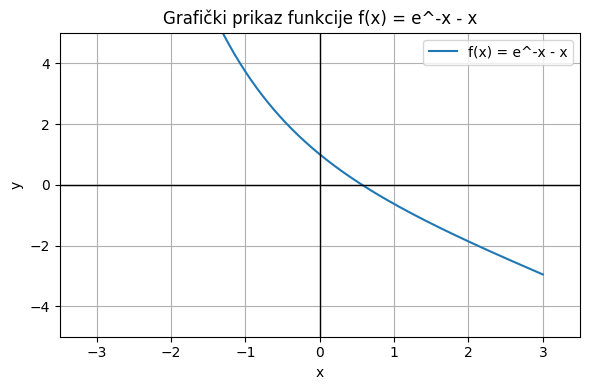

In [ ]:
# Crtanje grafičkog prikaza
x = np.linspace(A, B, 400)
y = f(x)
plt.figure(figsize=(6,4))
plt.plot(x, y, label='f(x) = e^-x - x')
plt.axhline(0, color='gray', linewidth=0.8)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Grafički prikaz funkcije f(x) = e^-x - x')
plt.legend()
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.xlim(-3.5, 3.5)
plt.ylim(-5, 5)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.tight_layout()
plt.show()

**Zaključak: Nultočka se nalazi u intervalu od -3 do 3**

2. Odredite nultočku funkcije:

• metodom bisekcije,

• Newton–Raphsonovom metodom,

• metodom sekante.


Bisekcija

In [ ]:
def my_bisection(f, a, b, tol):
    # approximates a root, R, of f bounded
    # by a and b to within tolerance
    # | f(m) | < tol with m the midpoint
    # between a and b Recursive implementation

    # check if a and b bound a root
    if np.sign(f(a)) == np.sign(f(b)):
        raise Exception(
         "The scalars a and b do not bound a root")

    # get midpoint
    m = (a + b)/2

    if np.abs(f(m)) < tol:
        # stopping condition, report m as root
        return m
    elif np.sign(f(a)) == np.sign(f(m)):
        # case where m is an improvement on a.
        # Make recursive call with a = m
        return my_bisection(f, m, b, tol)
    elif np.sign(f(b)) == np.sign(f(m)):
        # case where m is an improvement on b.
        # Make recursive call with b = m
        return my_bisection(f, a, m, tol)

In [ ]:
# Parametri
a = 0.55
b = 0.6
eps = 0.00001

nultocka = my_bisection(f, a, b,eps)
print(f"Nultočka u intervalu [{a}, {b}] približno je x = {nultocka:.12f}")

Nultočka u intervalu [0.55, 0.6] približno je x = 0.567138671875


Newton

In [ ]:
def df(x):
  return -np.exp(-x) - 1

In [ ]:
def newton_method(x0, tol=1e-6, max_iter=100):
    x = x0
    for i in range(max_iter):
        fx = f(x)
        dfx = df(x)
        if dfx == 0:
            print("Derivacija je nula. Metoda se ne može nastaviti.")
            return None
        x_new = x - fx / dfx
        print(f"Iteracija {i}: x = {x_new}, f(x) = {f(x_new)}")
        if abs(x_new - x) < tol:
            print(f"Konvergencija postignuta nakon {i+1} iteracija. Rješenje: {x_new}")
            return x_new
        x = x_new
    print("Nije postignuta zadana točnost.")
    return x

# Primjer poziva funkcije
x0 = 0.55  # početna aproksimacija
newton_method(x0)

Iteracija 0: x = 0.567089833933259, f(x) = 8.377476886234358e-05
Iteracija 1: x = 0.567143289892699, f(x) = 8.103460125141737e-10
Iteracija 2: x = 0.5671432904097838, f(x) = 0.0
Konvergencija postignuta nakon 3 iteracija. Rješenje: 0.5671432904097838


np.float64(0.5671432904097838)

Sekanta

In [ ]:
def secant_method(f, x0, x1, tol=1e-6, max_iter=100):
    for i in range(max_iter):
        f_x0 = f(x0)
        f_x1 = f(x1)

        if f_x1 - f_x0 == 0:
            print("Dijeljenje nulom. Metoda se prekida.")
            return None
        x2 = x1 - f_x1 * (x1 - x0) / (f_x1 - f_x0)
        print(f"Iteracija {i}: x = {x2}, f(x) = {f(x2)}")
        if abs(f(x1)) < tol:
            print(f"Približno rješenje: {x2} nakon {i+1} iteracija")
            return x2
        x0, x1 = x1, x2
    print("Nije postignuta zadana točnost.")
    return x2



# Početne aproksimacije
x0 = 1.0
x1 = 2.0

secant_method(f, x0, x1)


Iteracija 0: x = 0.48714165349848604, f(x) = 0.1272383442057925
Iteracija 1: x = 0.5837796851369866, f(x) = -0.02599356378037354
Iteracija 2: x = 0.5673864490804865, f(x) = -0.0003810477141589219
Iteracija 3: x = 0.5671425603070896, f(x) = 1.1441756897490052e-06
Iteracija 4: x = 0.5671432904419066, f(x) = -5.0340953627880936e-11
Iteracija 5: x = 0.5671432904097838, f(x) = 0.0
Približno rješenje: 0.5671432904097838 nakon 6 iteracija


np.float64(0.5671432904097838)

**Zaključak:**

**bisekcija: x = 0.567138671875**

**newton: x = 0.5671432904097838**

**sekanta: x = 0.5671432904097838**

3. Za svaku metodu:

• zapišite iteracijsku formulu,

• definirajte kriterij zaustavljanja,

• izračunajte aproksimativnu relativnu pogrešku

**Iteracijske formule**

Bisekcija: xest=(a-b)/2

Newton:

**Kriterij zaustavljanja**

Bisekcija: propisana tolerancija ili maksimalan broj iteracija

Newton: krećemo od x0=donja granica intervala, zatim pomoću iterativne formule dobijemo xn+1, i tako sve dok ne dođemo do f(x)=0

Sekanta: odaberemo dvije početne točke, zatim pomoću iterativne formule dobijemo xn+1, i tako sve dok ne dođemo do f(x)=0

4. Usporedite metode prema brzini konvergencije i robusnosti.
